In [40]:
!pip install tqdm scipy

Path found:
[(8, 5), (7, 4), (7, 3), (6, 2), (5, 1), (4, 1), (3, 1), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
Number of operations: 53


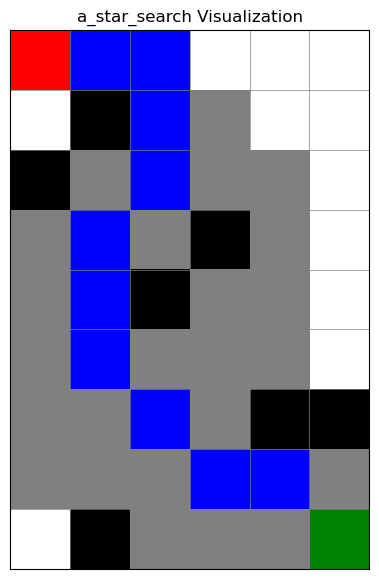

In [3]:
# Code from exercises week 5, modified A* algorithm, BoMR course

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from heapq import heappush, heappop # used if you want to use heap queue for priority queue (easier to implement) but not compulsory

def heuristic(a, b):
    # Implement the Euclidean distance heuristic
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def in_grid(grid, pos):
    return 0 <= pos[0] < grid.shape[0] and 0 <= pos[1] < grid.shape[1]

def is_obstacle(grid, pos):
    return not in_grid(grid, pos) or (grid[pos] == -1)
    

def a_star_search(map_grid, start, goal):
    # Initialize the open set as a priority queue and add the start node
    open_set = []
    heappush(open_set, (heuristic(start, goal), 0, start))  # (f_cost, g_cost, position)

    # Initialize the came_from dictionary
    came_from = {}
    # Initialize g_costs dictionary with default value of infinity and set g_costs[start] = 0
    g_costs = {start: 0}
    # Initialize the explored set
    explored = set()
    operation_count = 0

    while open_set:
        # Pop the node with the lowest f_cost from the open set
        current_f_cost, current_g_cost, current_pos = heappop(open_set)

        # Add the current node to the explored set
        explored.add(current_pos)

        # For directly reconstruct path
        if current_pos == goal:
            break
        
        up         = (current_pos[0] - 1, current_pos[1]    )
        down       = (current_pos[0] + 1, current_pos[1]    )  # Down
        left       = (current_pos[0]    , current_pos[1] - 1)  # Left
        right      = (current_pos[0]    , current_pos[1] + 1)  # Right
        up_left    = (current_pos[0] - 1, current_pos[1] - 1)  # Up Left
        down_right = (current_pos[0] + 1, current_pos[1] + 1)  # Down Right
        down_left  = (current_pos[0] + 1, current_pos[1] - 1)  # Down Left
        up_right   = (current_pos[0] - 1, current_pos[1] + 1)   # Up Right
        # Get the neighbors of the current node (up, down, left, right)
        neighbors = [up, down, left, right, up_left, down_right, down_left, up_right]
        
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, left) :
                neighbors.remove(up_left)
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, right):
                neighbors.remove(up_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, right):
                neighbors.remove(down_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, left):
                neighbors.remove(down_left)
            
                
        for neighbor in neighbors:
            # Check if neighbor is within bounds and not an obstacle
            if (in_grid(map_grid,neighbor)) and map_grid[neighbor[0], neighbor[1]] != -1 and neighbor not in explored:
                # Calculate tentative_g_cost
                tentative_g_cost = current_g_cost + heuristic(current_pos, neighbor)
                
                # If this path to neighbor is better than any previous one
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    # Update came_from, g_costs, and f_cost
                    came_from[neighbor] = current_pos
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)

                    # Add neighbor to open set
                    heappush(open_set, (f_cost, tentative_g_cost, neighbor))
                    operation_count += 1

    # Reconstruct path
    if current_pos == goal:
        path = []
        while current_pos in came_from:
            path.append(current_pos)
            current_pos = came_from[current_pos]
        path.append(start)
        return path[::-1], explored,operation_count
    else:
        # If we reach here, no path was found
        return None, explored,operation_count
    
    
##############################################
#do not modify this code
##############################################
def display_map(map_grid, path, start, goal, explored):
    cmap = ListedColormap(['white', 'black', 'blue', 'green', 'red', 'grey'])
    map_display = np.zeros_like(map_grid, dtype=object)

    # Assign colors based on the map grid values
    map_display[map_grid == -1] = 'black'  # Obstacles
    map_display[map_grid == 0] = 'white'   # Free space

    for position in explored:
        if map_display[tuple(position)] == 'white':
            map_display[tuple(position)] = 'grey'  # Explored cells

    # Visualize the path
    for position in path:
        if map_display[position[0], position[1]] in ['white', 'grey']:
            map_display[position[0], position[1]] = 'blue'  # Path

    map_display[start[0], start[1]] = 'green'  # Start
    map_display[goal[0], goal[1]] = 'red'      # Goal

    # Convert color names to numbers for plotting
    color_mapping = {'white': 0, 'black': 1, 'blue': 2, 'green': 3, 'red': 4, 'grey': 5, 'yellow': 6}
    map_numeric_display = np.vectorize(color_mapping.get)(map_display)
    fig, ax = plt.subplots(figsize=(6, 7))
    ax.imshow(map_numeric_display, cmap=cmap)
    ax.set_xticks(np.arange(-0.5, map_grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, map_grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title('a_star_search Visualization')
    plt.show()

map_height = 9
map_width = 6
Map = np.zeros((map_height, map_width))


#Map[0, :] = -1; Map[map_height - 1, :] = -1; Map[:, 0] = -1; Map[:, map_width - 1] = -1


Map[8, 1] = -1; Map[6, 4:6] = -1; Map[4, 2:3] = -1; Map[3, 3] = -1; Map[1, 1] = -1; Map[2, 0] = -1#Map[6,4] = -1; Map[7,4] = -1# obstacle
SearchStart =  (8, 5)
SearchGoal  =  (0, 0)

path, explored, operation_count = a_star_search(Map, SearchStart, SearchGoal)

# Display the result
if path:
    print("Path found:")
    print(path)
    print(f"Number of operations: {operation_count}")
    display_map(Map, path, SearchStart, SearchGoal, explored)
else:
    print("No path found.")


In [4]:
directions = [
    'N',   # North
    'NE',  # Northeast
    'E',   # East
    'SE',  # Southeast
    'S',   # South
    'SW',  # Southwest
    'W',   # West
    'NW'  # Northwest
]

orientation = 0 # Suppose Thymio is initially pointing North

def step_to_direction(step):
    if step[0] == 1:
        if step[1] == 1:
            return 3
        
        if step[1] == -1:
            return 5
        
        return 4
    
    if step[0] == -1:
        if step[1] == 1:
            return 1
        
        if step[1] == -1:
            return 7
        
        return 0
    
    if step[1] == 1:
        return 2
    
    return 6

path_directions = []
for i in range(len(path)-1):
    step = (path[i+1][0] - path[i][0], path[i+1][1] - path[i][1])
    path_directions.append(step_to_direction(step))

for direction in path_directions:
    print(directions[direction])

NW
W
NW
NW
N
N
NE
N
N
W
W


In [5]:
orientation = 0
for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    orientation = direction
    print(rotation, rotation_direction)
    

1 -1
1 -1
1 1
0 0
1 1
0 0
1 1
1 -1
0 0
2 -1
0 0


In [1]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 608f09df-b044-4573-8414-efa666631e72

In [12]:
orientation = 0
def motors(left, right):
    # Function from exercises week 8, BoMR course
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    diag_factor = 1 
    if not (direction % 2):
        diag_factor = np.sqrt(2)
        
    
    if rotation != 0:
        node.send_set_variables(motors(100*rotation_direction, -100*rotation_direction))
        await client.sleep(1.2 * rotation)
        orientation = direction
    node.send_set_variables(motors(100, 100))
    
    await client.sleep(2*diag_factor)
node.send_set_variables(motors(0, 0))


In [11]:
node.send_set_variables(motors(0, 0))